In [1]:
#required imports
import os
import re
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#list of stop words collected from internet.
stop_words=['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 
            'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot',
            'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 
            'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", 
            "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', 
            "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 
            'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'or', 'other',
            'ought', 'our', "our's", 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's",
            'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 
            'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 
            'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't", 'we', "we'd", "we'll", 
            "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where', "where's", 'which', 
            'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't", 'you', "you'd", 
            "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'a', 'able', 'about', 'above', 'abst', 'accordance',
            'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 
            'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 
            'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow',
            'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren',
            'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b',
            'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 
            'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 
            'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', "can't", 'cause',
            'causes', 'certain', 'certainly', 'co', 'com', 'come', 'comes', 'contain', 'containing', 'contains', 'could', 
            'couldnt', 'd', 'date', 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', 'done', "don't", 'down', 
            'downwards', 'due', 'during', 'e', 'each', 'ed', 'edu', 'effect', 'eg', 'eight', 'eighty', 'either', 'else', 
            'elsewhere', 'end', 'ending', 'enough', 'especially', 'et', 'et-al', 'etc', 'even', 'ever', 'every', 'everybody',
            'everyone', 'everything', 'everywhere', 'ex', 'except', 'f', 'far', 'few', 'ff', 'fifth', 'first', 'five', 'fix',
            'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'found', 'four', 'from', 'further', 
            'furthermore', 'g', 'gave', 'get', 'gets', 'getting', 'give', 'given', 'gives', 'giving', 'go', 'goes', 'gone', 
            'got', 'gotten', 'h', 'had', 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', 'hed', 
            'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'heres', 'hereupon', 'hers', 'herself', 'hes', 'hi', 
            'hid', 'him', 'himself', 'his', 'hither', 'home', 'how', 'howbeit', 'however', 'hundred', 'i', 'id', 'ie', 'if',
            "i'll", 'im', 'immediate', 'immediately', 'importance', 'important', 'in', 'inc', 'indeed', 'index', 
            'information', 'instead', 'into', 'invention', 'inward', 'is', "isn't", 'it', 'itd', "it'll", 'its', 'itself', 
            "i've", 'j', 'just', 'k', 'keeps', 'kept', 'kg', 'km', 'know', 'known', 'knows', 'l', 'largely', 'last', 'lately',
            'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', 'lets', 'like', 'liked', 'likely', 'line', 'little',
            "'ll", 'look', 'looking', 'looks', 'ltd', 'm', 'made', 'mainly', 'make', 'makes', 'many', 'may', 'maybe', 'me',
            'mean', 'means', 'meantime', 'meanwhile', 'merely', 'mg', 'might', 'million', 'miss', 'ml', 'more', 'moreover', 
            'most', 'mostly', 'mr', 'mrs', 'much', 'mug', 'must', 'my', 'myself', 'n', 'na', 'name', 'namely', 'nay', 'nd', 
            'near', 'nearly', 'necessarily', 'necessary', 'need', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 
            'nine', 'ninety', 'no', 'nobody', 'non', 'none', 'nonetheless', 'noone', 'nor', 'normally', 'nos', 'not', 'noted',
            'nothing', 'now', 'nowhere', 'o', 'obtain', 'obtained', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay',
            'old', 'omitted', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'ord', 'other', 'others', 'otherwise', 
            'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'owing', 'own', 'p', 'page', 'pages', 
            'part', 'particular', 'particularly', 'past', 'per', 'perhaps', 'placed', 'please', 'plus', 'poorly', 'possible',
            'possibly', 'potentially', 'pp', 'predominantly', 'present', 'previously', 'primarily', 'probably', 'promptly', 
            'proud', 'provides', 'put', 'q', 'que', 'quickly', 'quite', 'qv', 'r', 'ran', 'rather', 'rd', 're', 'readily', 
            'really', 'recent', 'recently', 'ref', 'refs', 'regarding', 'regardless', 'regards', 'related', 'relatively', 
            'research', 'respectively', 'resulted', 'resulting', 'results', 'right', 'run', 's', 'said', 'same', 'saw', 'say',
            'saying', 'says', 'sec', 'section', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves',
            'sent', 'seven', 'several', 'shall', 'she', 'shed', "she'll", 'shes', 'should', "shouldn't", 'show', 'showed', 
            'shown', 'showns', 'shows', 'significant', 'significantly', 'similar', 'similarly', 'since', 'six', 'slightly', 
            'so', 'some', 'somebody', 'somehow', 'someone', 'somethan', 'something', 'sometime', 'sometimes', 'somewhat', 
            'somewhere', 'soon', 'sorry', 'specifically', 'specified', 'specify', 'specifying', 'still', 'stop', 'strongly', 
            'sub', 'substantially', 'successfully', 'such', 'sufficiently', 'suggest', 'sup', 'sure', 't', 'take', 'taken', 
            'taking', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that'll", 'thats', "that've", 'the', 
            'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'thered', 'therefore',
            'therein', "there'll", 'thereof', 'therere', 'theres', 'thereto', 'thereupon', "there've", 'these', 'they', 'theyd',
            "they'll", 'theyre', "they've", 'think', 'this', 'those', 'thou', 'though', 'thoughh', 'thousand', 'throug', 'through',
            'throughout', 'thru', 'thus', 'til', 'tip', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 
            'truly', 'try', 'trying', 'ts', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 'unless', 'unlike', 'unlikely', 
            'until', 'unto', 'up', 'upon', 'ups', 'us', 'use', 'used', 'useful', 'usefully', 'usefulness', 'uses', 'using', 'usually',
            'v', 'value', 'various', "'ve", 'very', 'via', 'viz', 'vol', 'vols', 'vs', 'w', 'want', 'wants', 'was', 'wasnt', 'way', 'we',
            'wed', 'welcome', "we'll", 'went', 'were', 'werent', "we've", 'what', 'whatever', "what'll", 'whats', 'when', 'whence', 
            'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'wheres', 'whereupon', 'wherever', 'whether', 'which',
            'while', 'whim', 'whither', 'who', 'whod', 'whoever', 'whole', "who'll", 'whom', 'whomever', 'whos', 'whose', 'why', 'widely',
            'willing', 'wish', 'with', 'within', 'without', 'wont', 'words', 'world', 'would', 'wouldnt', 'www', 'x', 'y', 'yes', 'yet', 
            'you', 'youd', "you'll", 'your', 'youre', 'yours', 'yourself', 'yourselves', "you've", 'z', 'zero']
print(len(stop_words))

838


In [3]:
#creating a dictionary to store the frequency corrosponding to the word.
word_freq_dict={}

#getting the list of all classes.
possible_classes=os.listdir('20_newsgroups')

#maintaing count to track current class.
count=0

#iterating over each class.
for cur_class in possible_classes:
    
    #getting the list of all possible documents in class.
    all_docs=os.listdir('20_newsgroups'+'/'+cur_class)
    
    #iterating over each document.
    for cur_doc in all_docs:
        
        #creating path for document.
        path = '20_newsgroups'+'/'+cur_class+'/'+cur_doc
        
        #opening document in read format.
        with open(path,'r') as file:
            
            #reading the content of document.
            file_data=file.read()
            
            #getting the all words present in document.
            all_possible_words=re.findall(r'\w+',file_data)
            
            #itearting over each word in list of all words.
            for word in all_possible_words:
                
                #creating check that if current word is not possible in stop_word list and current word length is not < 3 
                #to avoid words like 'a','an','the','is' etc and current word is alphabet.
                if (word.lower() not in stop_words) and (len(word.lower())>3) and (word.lower().isalpha()):
                    
                    #increamenting the count depending upon occurence of word.
                    word_freq_dict[word.lower()]=word_freq_dict.get(word.lower(),0)+1
    
    #print the serial of class executed currently.
    print(count+1,'class done')
    
    #increamenting the count.
    count+=1
    
#printing the length of dictionary.
print(len(word_freq_dict))

#printing the dictionary.
print(word_freq_dict) 

1 class done
2 class done
3 class done
4 class done
5 class done
6 class done
7 class done
8 class done
9 class done
10 class done
11 class done
12 class done
13 class done
14 class done
15 class done
16 class done
17 class done
18 class done
19 class done
20 class done
95963
{'xref': 6064, 'cantaloupe': 26048, 'atheism': 2563, 'moderated': 58, 'news': 34309, 'answers': 913, 'path': 20369, 'crabapple': 6235, 'andrew': 4458, 'ohio': 15887, 'state': 18842, 'magnus': 1340, 'usenet': 8308, 'cwru': 2732, 'agate': 1827, 'spool': 581, 'uunet': 5369, 'pipex': 759, 'ibmpcug': 109, 'mantis': 625, 'mathew': 426, 'newsgroups': 20404, 'subject': 21589, 'atheist': 406, 'resources': 475, 'summary': 983, 'books': 950, 'addresses': 242, 'music': 481, 'keywords': 1554, 'fiction': 148, 'contacts': 100, 'message': 21954, 'expires': 161, 'followup': 1485, 'distribution': 4753, 'organization': 19840, 'consultants': 92, 'cambridge': 470, 'approved': 1322, 'request': 848, 'supersedes': 50, 'lines': 20894, 'ar

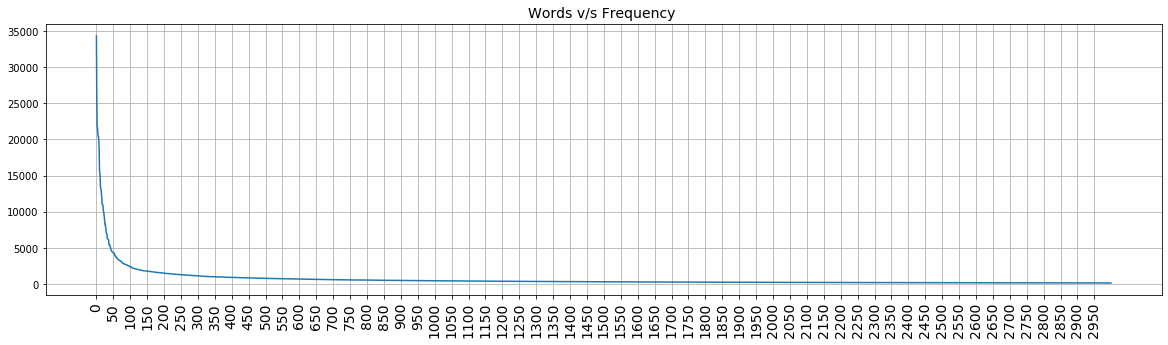

In [4]:
#Sorting the dictionary inorder to get the words decreasing of their frequency.
word_freq_dict_sorted={k : v for k,v in sorted(word_freq_dict.items(),key=lambda item:item[1],reverse=True)}

# storing the words ( keys of dictionary) and its frequencies ( values of dictionary) in a array inorder to plot the graph.
words = [key for key,val in word_freq_dict_sorted.items()]
frequencies = [val for key,val in word_freq_dict_sorted.items()]

# setting the limit to avoid the least frequencies words
lower_limit=0   
upper_limit=3000

# defining the figure size for better visualization.
plt.figure(figsize=(20, 5))

# plotting the line graph
plt.plot(np.arange(len(words))[lower_limit:upper_limit],frequencies[lower_limit:upper_limit])
plt.title("Words v/s Frequency ",size=14)
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=90,size=14)
plt.grid()
plt.show()

In [5]:
#looking the graph after 3000 words, the words frequency tends to remain at 1 so ignoring those words by selecting first 3000 words.
final_vocab_words=words[lower_limit:upper_limit]

In [6]:
'''after getting the top 3000 words, now we will calculate the frequncy of each word appeared in each document and 
storing the frequency in sepreate list, after that merging it to final list(containg the list corrosponding to 
each document).
'''
#creating the count to track the current executing class.
count=0

#declaring final_arr which will contain the list corrosponding to each document.
final_arr=[]

#itearting over each class.
for curr_class in possible_classes:
    
    #Getting the list of all possible documents in current class.
    all_docs=os.listdir('20_newsgroups'+'/'+curr_class)
    
    #iterating over each document.
    for cur_doc in all_docs:
        
        #creating path for document
        path='20_newsgroups'+'/'+curr_class+'/'+cur_doc
        
        #opening document in read format.
        with open(path,'r') as file:
            
            #reading the content of document.
            file_data=file.read()
            
            #getting the all words present in document.
            all_possible_words=re.findall(r'\w+',file_data)
            
            #Creating a list of equal size as final_vocab_words to store the frequency of each word in current document.
            l=[0]*len(final_vocab_words)
            
            #itearting over each word in list of all words.
            for word in all_possible_words:
                
                #Checking if the word is present in final_vocab_words then increamentiing the count.
                if word.lower() in final_vocab_words:
                    l[final_vocab_words.index(word.lower())]+=1
        
        #after getting the list for current document appending the class to which it belongs.
        l.append(curr_class)
        
        #appending the list to the final array.
        final_arr.append(l)
        
    #printing the count of current executed class.
    print(count+1,'class done')
    count+=1         

1 class done
2 class done
3 class done
4 class done
5 class done
6 class done
7 class done
8 class done
9 class done
10 class done
11 class done
12 class done
13 class done
14 class done
15 class done
16 class done
17 class done
18 class done
19 class done
20 class done


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
#Creating dataframe.
data=pd.DataFrame(final_arr)

In [8]:
#Adding CLASSES to final_vocab_words which is column to indicate the target column.
final_vocab_words.append('CLASSES')

#Adding columns to dataframe.
data.columns=final_vocab_words

In [9]:
#Viewing the data frame.
data.head()

,news,cantaloupe,message,subject,lines,newsgroups,path,organization,state,ohio,...,idle,suffer,tree,hide,bound,pattern,limits,attached,awful,CLASSES
0,4,2,1,1,2,1,1,2,2,2,...,0,0,0,0,0,0,0,0,0,alt.atheism
1,3,2,2,2,1,1,1,2,9,0,...,0,0,0,0,0,0,0,0,0,alt.atheism
2,2,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,alt.atheism
3,1,2,1,1,1,1,1,1,3,0,...,0,0,0,0,0,0,0,0,0,alt.atheism
4,0,2,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,alt.atheism


In [10]:
#Describing the dataframe.
data.describe(include='all')

,news,cantaloupe,message,subject,lines,newsgroups,path,organization,state,ohio,...,idle,suffer,tree,hide,bound,pattern,limits,attached,awful,CLASSES
count,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,...,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rec.sport.hockey
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,1.715707,1.302595,1.097865,1.079612,1.044857,1.020353,1.018603,0.992149,0.942241,0.794469,...,0.007951,0.007951,0.007951,0.007951,0.007951,0.007951,0.007951,0.007951,0.007951,NaN
std,1.480837,0.459393,0.554378,0.779541,0.362166,0.230535,0.280838,0.309528,1.302672,1.126862,...,0.200736,0.097410,0.122841,0.107653,0.098938,0.134872,0.106250,0.109495,0.122024,NaN
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [11]:
#Creating the csv file.
data.to_csv('Text_classification_NB.csv',index=False)

In [12]:
#Getting the target values.
Y=data['CLASSES'].values

In [13]:
#Getting the data values.
X=data[data.columns[:-1]].values

In [14]:
#Printing the shapes for data and target column.
X.shape,Y.shape

((19997, 3000), (19997,))

In [15]:
#Spliiting the dataset in training and testing.
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)

### Using inbuilt MultinomialNB.

In [16]:
#Creating the inbuilt classifier.
clf=MultinomialNB()

#Fitting the training data.
clf.fit(X_train,Y_train)

#predicting the values for test data.
Y_pred=clf.predict(X_test)

In [17]:
#Creating the classification report.
print(classification_report(Y_test,Y_pred))

#Printing the classification matrix.
print(confusion_matrix(Y_test,Y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.82      0.82       233
           comp.graphics       0.84      0.81      0.82       253
 comp.os.ms-windows.misc       0.77      0.88      0.82       249
comp.sys.ibm.pc.hardware       0.66      0.77      0.71       240
   comp.sys.mac.hardware       0.76      0.76      0.76       236
          comp.windows.x       0.91      0.73      0.81       240
            misc.forsale       0.87      0.93      0.90       261
               rec.autos       0.88      0.90      0.89       269
         rec.motorcycles       0.91      0.95      0.93       284
      rec.sport.baseball       0.95      0.93      0.94       248
        rec.sport.hockey       0.93      0.99      0.96       231
               sci.crypt       0.97      0.95      0.96       233
         sci.electronics       0.85      0.84      0.85       244
                 sci.med       0.96      0.79      0.87       256
         

In [18]:
inbuilt_classifier=classification_report(Y_test,Y_pred).split('\n')
class_name_inbuilt=[]
for i in inbuilt_classifier:
    if i=='':
        inbuilt_classifier.remove(i)
f1_scores_inbuilt=[]
for i in inbuilt_classifier[1:-3]:
    f1_scores_inbuilt.append(float(i.split()[3]))
    class_name_inbuilt.append(i.split()[0])

In [19]:
#Getting the target value for own classifier.
Y_=data['CLASSES']

In [20]:
#Getting the data values for own classifier.
X_=data[data.columns[:-1]].values

#Printing the shape for the data.
X_.shape,Y_.shape

((19997, 3000), (19997,))

### Implementing of MultinomialNB by ourself.

In [21]:
def fit(X,Y):
    '''
        #Fit function for the own classifier.
        
        parameters 
                X: training data.
                Y: training data target value.
        returns
            Dictionary
                keys  : class values
                values: Dictionary
                        Key   : words of particular class.
                        values: Frequency of word present in class.
    '''
    
    #Creating the result dictionary.
    result={}
    
    #Getting the unique classes present in target class values.
    classes=set(Y)
    
    #maintaing the count of total words present.
    result['Total_words']=0
    
    #iterating over each classes.
    for curr_class in classes:
        
        #Creating the dictionary for current class.
        result[curr_class]={}
        
        #Selecting the rows for the current class.
        sel_rows=(Y==curr_class)
        
        #Selecting the training rows for the current class.
        X_train_curr=X[sel_rows]
        
        #Selecting the target rows for the current class.
        Y_train_curr=Y[sel_rows]
        
        #Getting the count of number of words in vocabulary.
        num_features=X.shape[1]
        
        #Creating key to store the count of words in particular class.
        result[curr_class]['total_word_class']=0
        
        #Iterating over the each words. 
        for j in range(num_features):
            
            #calculating its total frequency of word for particular class.
            result[curr_class][j]=X_train_curr[:,j].sum()
            
            #updating the count of words for class.
            result[curr_class]['total_word_class']+=result[curr_class][j]
            
        #updating the count of total words of document.
        result['Total_words']+=result[curr_class]['total_word_class']
    return result   

In [22]:
def probability(dictionary,x,cur):
    '''
    #Function to calculate the probaility of data points for given class.
    
    parameters:
        dictionary: returned from fit function.
        x         : data point from x_test
        cur       : target class
        
    return :
        returns the probability.
    '''
    
    #getting the probability for of the words belong to given class.
    output=np.log(dictionary[cur]['total_word_class'])-np.log(dictionary['Total_words'])
    
    #Getting the number of features.
    num_features=len(x)
    
    #iterating over the each feature.
    for f in range(num_features):
        
        #checking if the current feature values is 0 to avoid calculation.
        if x[f]==0:
            continue
            
        #Gettting the  count of cuurent feature present in current class and using laplace correction.
        num=dictionary[cur][f]+1
        
        #Getting the count of number of total values for class.
        den=dictionary[cur]['total_word_class']+num_features
        
        #calculating the probability.
        prob=np.log(num)-np.log(den)
        
        #adding it to the output.
        output+=prob
        
    #returning the probability.
    return output

In [23]:
def predictSinglePoint(dictionary,x):
    '''
    #Function used to predict the class which the data point belongs to.
    
    parameters:
        dictionary :returned from fit function.
        x          :data point in X_test.
    returns: 
        class to which the current data point belongs to.
    '''
    #getting the all possible class values.
    classes_present=dictionary.keys()
    
    #setting the max_class as -1 initially.
    max_class=-1
    is_first=True
    
    #setting probability for max_class as -10000000000 initially.
    cls_prob=-1000000000
    
    #iterating over each class.
    for cur in classes_present:
        
        #checking the current class in not 'Total_words.'
        if cur=='Total_words':
            continue
            
        #getting the probability for current class.
        cur_prob=probability(dictionary,x,cur)
        
        #updating the max_class and its probability if probability calculated is bigger.
        if (is_first or cur_prob>cls_prob):
            max_class=cur
            cls_prob=cur_prob
        is_first=False
        
    #return the max class.
    return max_class

In [24]:
def predict(dictionary,X_test):
    '''
    #function to return the predicted values for testing data.
    parameters:
        dictionary: returned from fit function.
        X_test    : testing data.
    returns:
        array containing the predicted values for xtest.
    '''
    #initialisng the vacant array to store the predicted values.
    y_pred=[]
    
    #iteratiing over data points in testing data.
    for x in X_test:
        
        #predicting the class.
        class_it_belongs=predictSinglePoint(dictionary,x)
        
        #appending it to the predicted array.
        y_pred.append(class_it_belongs)
        
    #returning the array.
    return y_pred

In [25]:
#splitting the dataset in training and test dataset. 
X_train_new,X_test_new,Y_train_new,Y_test_new=model_selection.train_test_split(X_,Y_,test_size=0.25,random_state=0)

In [26]:
#training our own classifier.
dic=fit(X_train_new,Y_train_new)

#predicting from test values.
Y_pred_new=predict(dic,X_test_new)

print(classification_report(Y_test_new,Y_pred_new))
print(confusion_matrix(Y_test_new,Y_pred_new))

                          precision    recall  f1-score   support

             alt.atheism       0.78      0.86      0.82       233
           comp.graphics       0.78      0.82      0.80       253
 comp.os.ms-windows.misc       0.77      0.86      0.81       249
comp.sys.ibm.pc.hardware       0.73      0.75      0.74       240
   comp.sys.mac.hardware       0.75      0.84      0.79       236
          comp.windows.x       0.93      0.73      0.82       240
            misc.forsale       0.87      0.93      0.90       261
               rec.autos       0.93      0.93      0.93       269
         rec.motorcycles       0.93      0.96      0.95       284
      rec.sport.baseball       0.97      0.97      0.97       248
        rec.sport.hockey       0.97      0.99      0.98       231
               sci.crypt       0.98      0.96      0.97       233
         sci.electronics       0.88      0.90      0.89       244
                 sci.med       0.96      0.82      0.88       256
         

In [27]:
#getting the classnames and the respective f1-scores predicted by own_classifier.
own_classifier=classification_report(Y_test_new,Y_pred_new)
classifier_list_own=own_classifier.split('\n')
class_names_own=[]
for i in classifier_list_own:
    if i=='':
        classifier_list_own.remove(i)
f1_scores_own=[]
for i in classifier_list_own[1:-3]:
    f1_scores_own.append(float(i.split()[3]))
    class_names_own.append(i.split()[0])

### Comparing the inbuilt classifier and self implemented classifier.

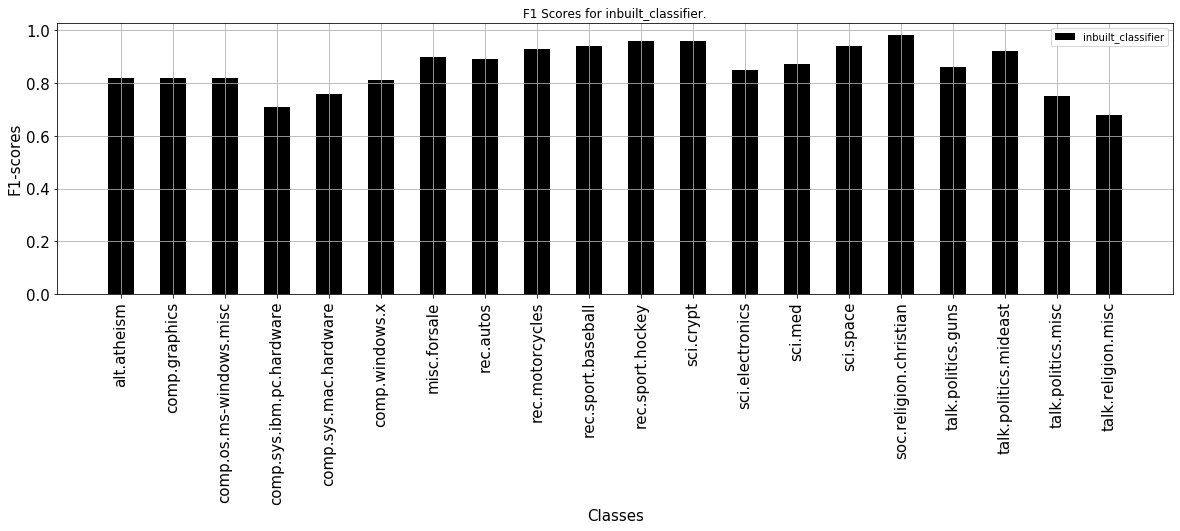

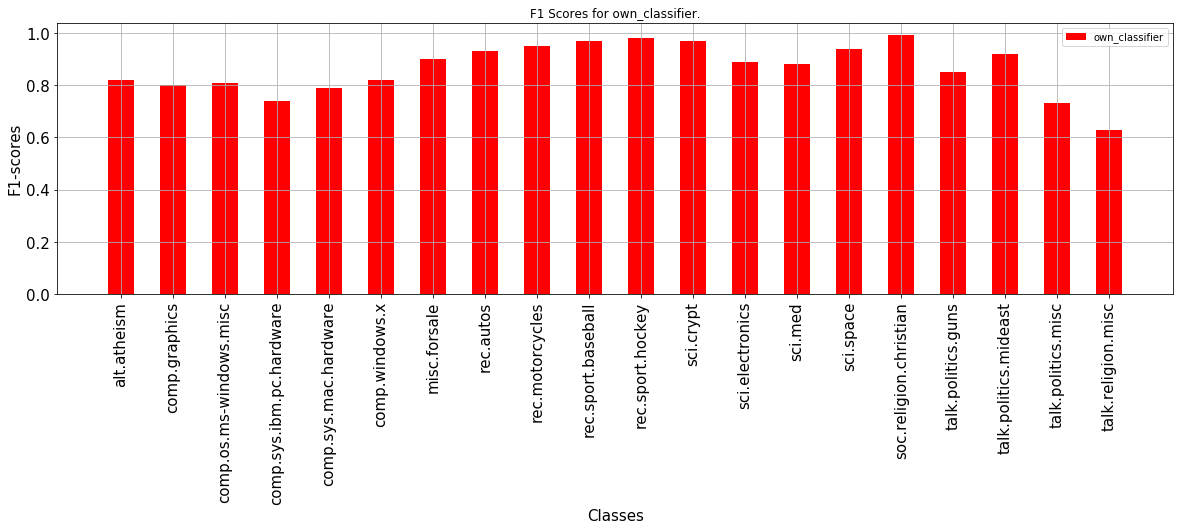

In [28]:
#plotting graph for inbuilt_classifier.
plt.figure(figsize=(20, 5))
plt.bar(class_name_inbuilt,f1_scores_inbuilt,color='black',width=0.5,label='inbuilt_classifier')
plt.grid()
plt.yticks(size=15)
plt.xticks(rotation=90,size=15)
plt.title('F1 Scores for inbuilt_classifier.')
plt.xlabel('Classes',size=15)
plt.ylabel('F1-scores',size=15)
plt.legend()
plt.show()

#plotting graph for own_classifier.
plt.figure(figsize=(20, 5))
plt.bar(class_names_own,f1_scores_own,color='red',width=0.5,label='own_classifier')
plt.grid()
plt.yticks(size=15)
plt.xticks(rotation=90,size=15)
plt.title('F1 Scores for own_classifier.')
plt.xlabel('Classes',size=15)
plt.ylabel('F1-scores',size=15)
plt.legend()
plt.show()

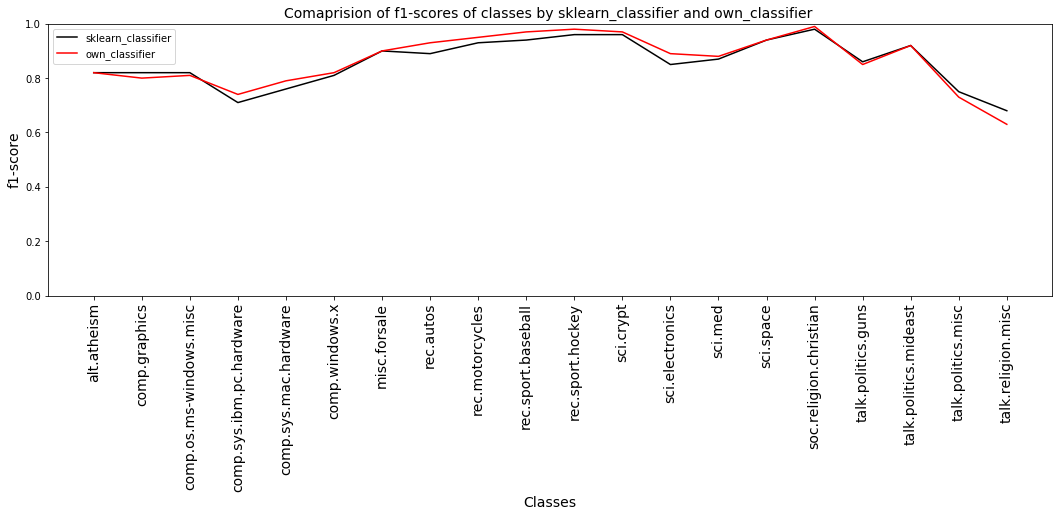

In [29]:
lt.subplots(figsize=(18,5))
plt.plot(class_name_inbuilt,f1_scores_inbuilt,color="black",label='sklearn_classifier')
plt.plot(class_name_inbuilt, f1_scores_own, color='red',label='own_classifier')
plt.xlabel("Classes",size=14)
plt.xticks(rotation=90,size=14)
plt.axis((None,None,0,1))
plt.ylabel("f1-score",size=14)
plt.title("Comaprision of f1-scores of classes by sklearn_classifier and own_classifier ",size=14)
plt.legend()
plt.show()

# Overall Accuracy remains same.